### 1. Load the Data
First, we'll load the `melb_data.csv` file into a pandas DataFrame and display the first few rows to understand its structure.

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('melb_data.csv')

# Display the first 5 rows of the DataFrame
display(df.head())

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


### 2. Data Preparation
Before training a model, we need to prepare our data. This involves selecting relevant features, handling missing values, and splitting the data into training and testing sets.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Drop rows with missing target values (Price)
df.dropna(axis=0, subset=['Price'], inplace=True)

# Select target and features
y = df.Price

# Choosing numerical features for simplicity. You might want to handle categorical features differently.
melb_predictors = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']

# Explicitly create a copy to avoid SettingWithCopyWarning
X = df[melb_predictors].copy()

# Handle missing values in features by filling with the mean. A more robust approach might be needed for real projects.
for col in melb_predictors:
    if X[col].isnull().any():
        X[col] = X[col].fillna(X[col].mean())

# Split data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### 3. Train a Random Forest Model
Now, we'll initialize and train a `RandomForestRegressor` model using our training data.

In [10]:
# Define the model
melbourne_model = RandomForestRegressor(random_state=1)

# Fit the model
melbourne_model.fit(train_X, train_y)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


### 4. Make Predictions
We'll use the trained model to make predictions on our validation set.

In [9]:
# Make predictions on validation data
val_predictions = melbourne_model.predict(val_X)

# Display the first 10 predictions
print("First 10 predictions:")
for i, pred in enumerate(val_predictions[:10]):
    print(f"Prediction {i+1}: {pred:.2f}")

First 10 predictions:
Prediction 1: 1792340.00
Prediction 2: 849247.00
Prediction 3: 580160.00
Prediction 4: 1303555.00
Prediction 5: 790595.00
Prediction 6: 1360145.00
Prediction 7: 709370.00
Prediction 8: 929190.00
Prediction 9: 664951.00
Prediction 10: 661985.00


### 5. Evaluate the Model
Finally, let's evaluate the model's performance using the Mean Absolute Error (MAE).

In [11]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(val_y, val_predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 175216.57


### 6. Visualize Actual vs. Predicted Values
Let's create a scatter plot to compare the actual prices (`val_y`) against the model's predicted prices (`val_predictions`). A diagonal line will represent perfect predictions.

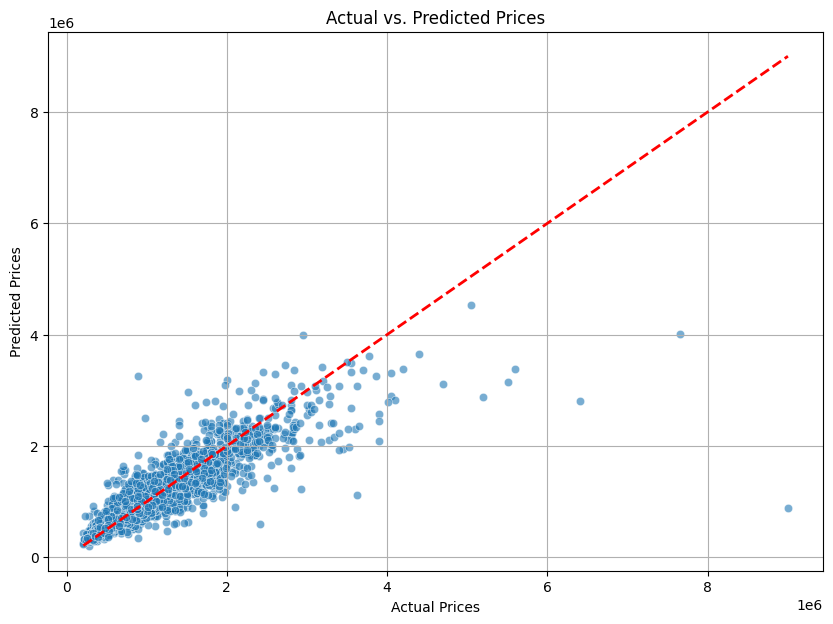

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x=val_y, y=val_predictions, alpha=0.6)
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], 'r--', lw=2) # Diagonal line for perfect prediction
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.grid(True)
plt.show()